In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [159]:
boston = pd.read_csv("/home/mike/my_project_folder/codes/HousingData.csv")

In [160]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [161]:
boston["target"] = boston["MEDV"]

In [162]:
boston.drop("MEDV", axis = 1, inplace = True)

In [163]:
boston  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [164]:
from sklearn.model_selection import train_test_split

x = boston.drop("target", axis = 1)
y = boston["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [165]:
boston["CHAS"].unique()

array([ 0., nan,  1.])

In [166]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
target      0
dtype: int64

## Checking the presence of outlier data using boxplot and interquartile range

In [167]:
boston_copy = boston.copy()

In [168]:
def iqr_func(data):
    q3 = np.percentile(data, [75])
    q1 = np.percentile(data, [25])
    iqr = q3 - q1
    return iqr

In [169]:
def outliers_func(data):
    outliers = []
    q3 = np.percentile(data, [75])
    q1 = np.percentile(data, [25])
    iqr = q3 - q1
    for i in data:
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outliers.append(True)
        else:
            outliers.append(False)
    return outliers

In [170]:
boston_copy = boston.copy()
boston_outliers = pd.DataFrame()
for col in boston_copy.columns:
    boston_outliers[col] = outliers_func(boston_copy[col])

In [171]:
row_outlier_count= boston_outliers.sum(axis = 1)

In [172]:
threshold = 3
rows_to_drop = row_outlier_count[row_outlier_count >= threshold].index

In [173]:
boston_cleaned = boston_copy.drop(index = rows_to_drop)

In [174]:
boston_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [175]:
boston_cleaned.isna().sum()

CRIM       19
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
target      0
dtype: int64

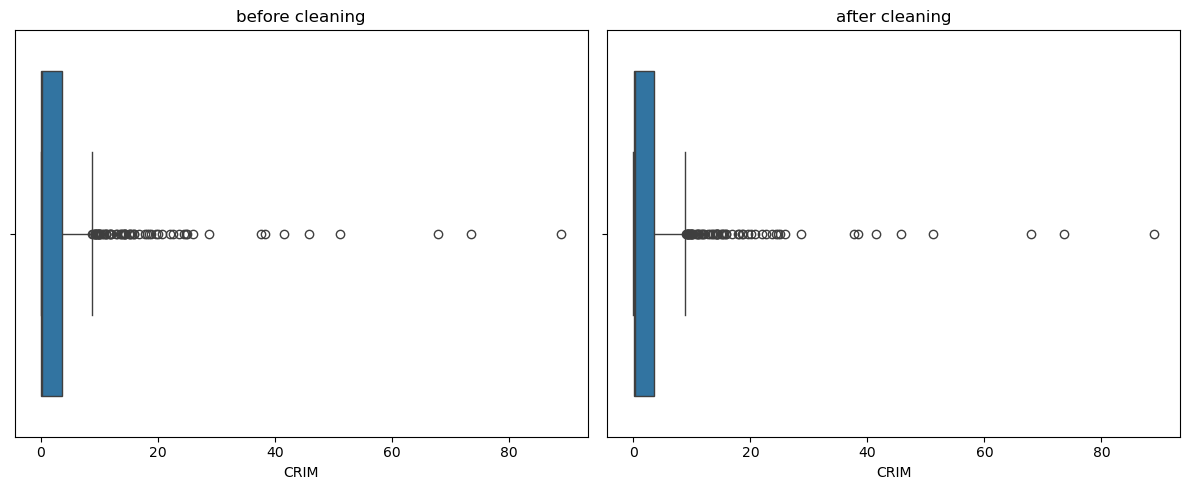

In [176]:
feature = "CRIM"
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(x = boston[feature])
plt.title("before cleaning")

plt.subplot(1,2,2)
sns.boxplot(x = boston_cleaned[feature])
plt.title("after cleaning")

plt.tight_layout()
plt.show()

In [177]:
boston_cleaned.isna().sum()

CRIM       19
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
target      0
dtype: int64

In [178]:
boston_cleaned["CHAS"].fillna(1, inplace = True)

<Axes: >

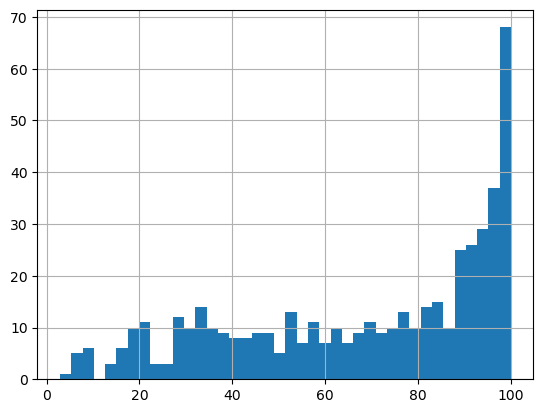

In [179]:
boston_cleaned["AGE"].hist(bins = 40,)

<Axes: xlabel='AGE', ylabel='Count'>

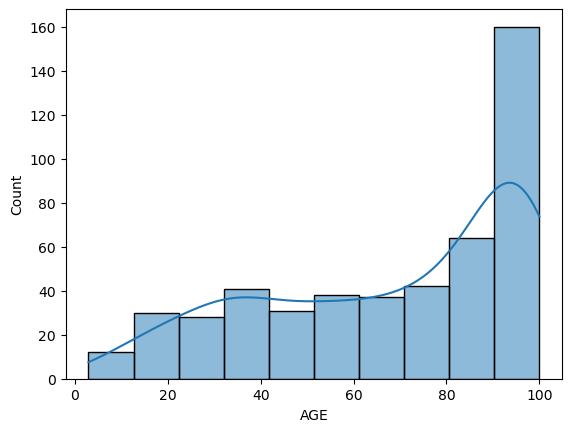

In [180]:
sns.histplot(boston_cleaned["AGE"], kde = True)

In [181]:
from sklearn.impute import SimpleImputer 
impute = SimpleImputer(strategy = "median") 

boston_cleaned["AGE"] = impute.fit_transform(boston_cleaned[["AGE"]])
filled_boston = impute.fit_transform(boston_cleaned)

In [182]:
filled_boston = pd.DataFrame(filled_boston, 
                             columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE' ,'DIS', 'RAD' ,'TAX' ,'PTRATIO' ,'B','LSTAT' ,'target'])

In [183]:
filled_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,11.48,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,11.48,22.4
499,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
500,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
501,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


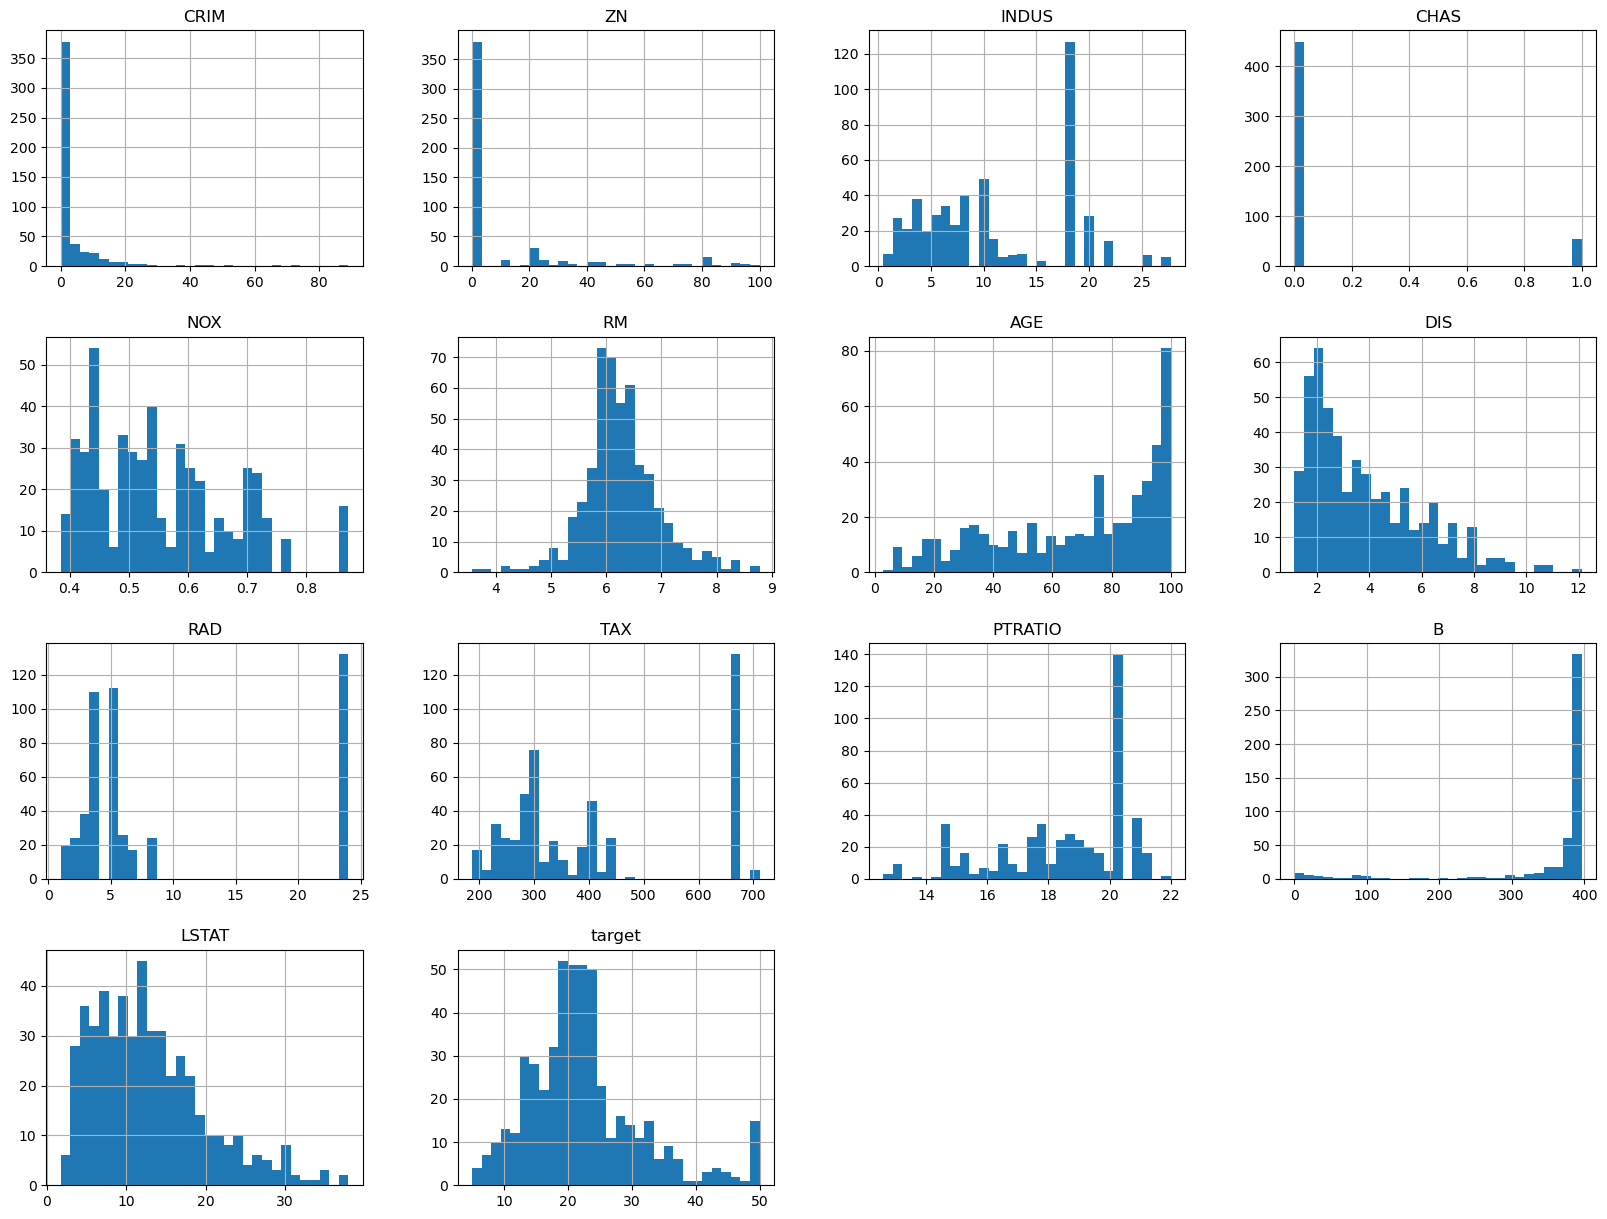

In [184]:
filled_boston.hist(bins = 30, figsize = (20, 15))
plt.show();

In [185]:
corr_matrix = filled_boston.corr()

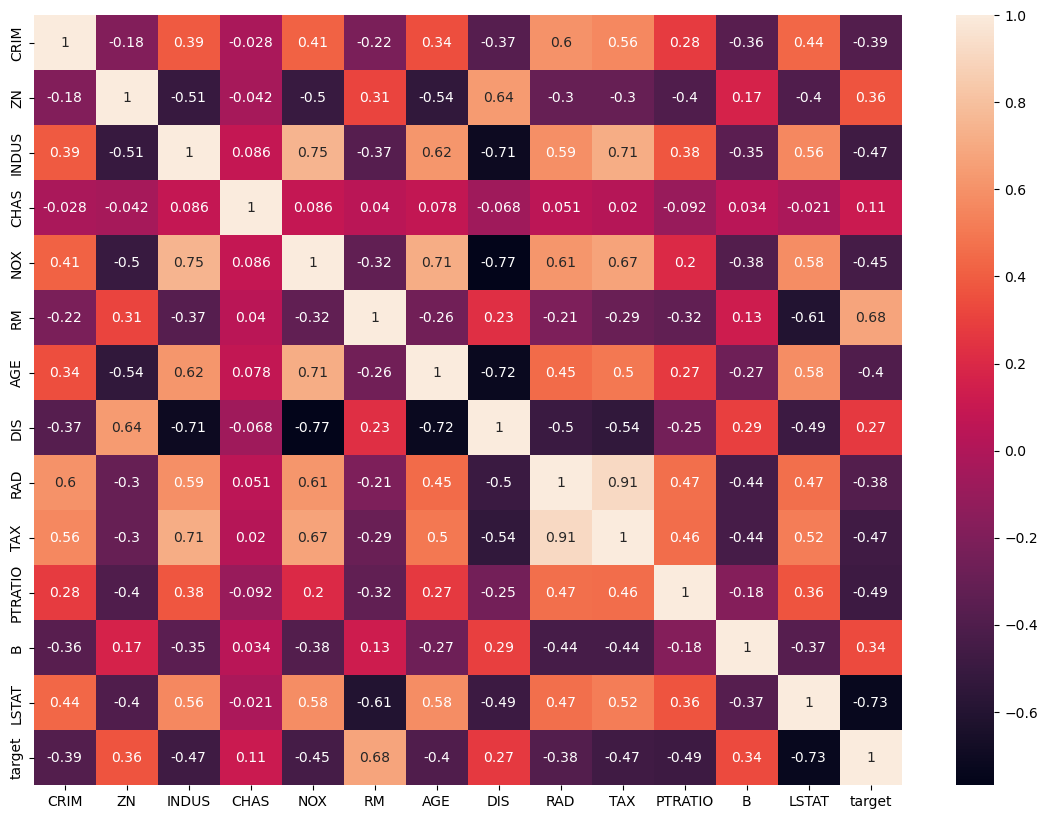

In [186]:
fig = plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, annot= True)
plt.show()

[Text(0.5, 0, 'indus'), Text(0, 0.5, 'target')]

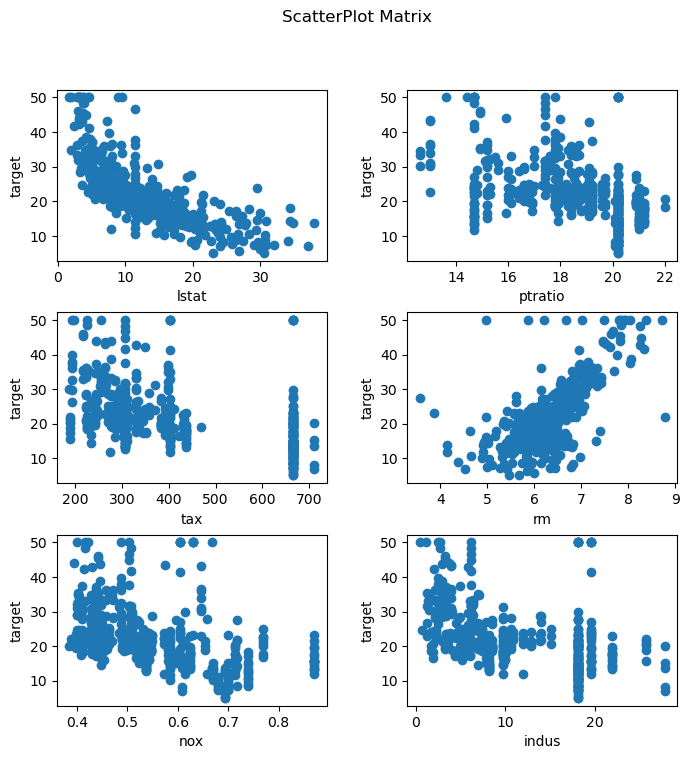

In [187]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 2, hspace=.3, wspace=.3)
(ax1, ax2), (ax3, ax4), (ax5, ax6) = gs.subplots(sharex='none', sharey='none')
fig.suptitle('ScatterPlot Matrix')
ax1.scatter(filled_boston["LSTAT"],filled_boston["target"])
ax1.set(xlabel ="lstat", ylabel= "target")
ax2.scatter(filled_boston["PTRATIO"], filled_boston["target"])
ax2.set(xlabel ="ptratio", ylabel= "target")
ax3.scatter(filled_boston["TAX"], filled_boston["target"])
ax3.set(xlabel ="tax", ylabel= "target")
ax4.scatter(filled_boston["RM"], filled_boston["target"])
ax4.set(xlabel ="rm", ylabel= "target")
ax5.scatter(filled_boston["NOX"], filled_boston["target"])
ax5.set(xlabel ="nox", ylabel= "target")
ax6.scatter(filled_boston["INDUS"], filled_boston["target"])
ax6.set(xlabel ="indus", ylabel= "target")

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model  = LinearRegression()

features = ["LSTAT", "RM", "PTRATIO", "NOX", "INDUS", "TAX" ]
x = filled_boston[features]
y = filled_boston["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 42)


model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [198]:
from sklearn.metrics import r2_score, mean_squared_error

In [199]:
mean_squared_error(y_test, y_pred)

18.027016565150355

In [200]:
r2_score(y_test, y_pred)

0.763110150787123

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
model  = DecisionTreeRegressor()

features = ["LSTAT", "RM", "PTRATIO", "NOX", "INDUS", "TAX" ]
x = filled_boston[features]
y = filled_boston["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 42)


model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [204]:
mean_squared_error(y_test, y_pred)

14.625742574257421

In [205]:
r2_score(y_test, y_pred)

0.8078056931649965